# California Housing Price
Data berkaitan dengan rumah yang ditemukan di distrik California tertentu dan beberapa statistik ringkasan tentang mereka berdasarkan data sensus tahun 1990. Berhati-hatilah karena data tidak dibersihkan sehingga diperlukan beberapa langkah pemrosesan awal! <br>
Kolomnya adalah sebagai berikut:
* longitude
* latitude
* housing_median_age
* total_rooms
* total_bedrooms
* population
* households
* median_income
* median_house_value
* ocean_proximity

Dataset source: https://www.kaggle.com/datasets/camnugent/california-housing-prices

## Packages
Import semua library yang dibutuhkan dalam proses pembuatan model.

In [1]:
# Plot & read dataframe 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# Data splitting
from sklearn.model_selection import train_test_split

# Algoritma model
from sklearn.ensemble import RandomForestRegressor

# Model evaluation
from sklearn.metrics import r2_score, mean_absolute_error

## Data Wrangling & EDA
Bagian ini membahas mengenai insight dari data yang telah dikumpulkan.

In [2]:
# Read data dengan pandas 
df = pd.read_csv('/content/housing.csv')

# Menampilkan data mulai dari atas sebanyak 5
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Menampilkan informasi seputar keseluruhan data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Merangkum keseluruhan insights mulai dari nilai max, min, mean, dan standar deviasi
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# Menampilkan jumlah setiap kategori
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

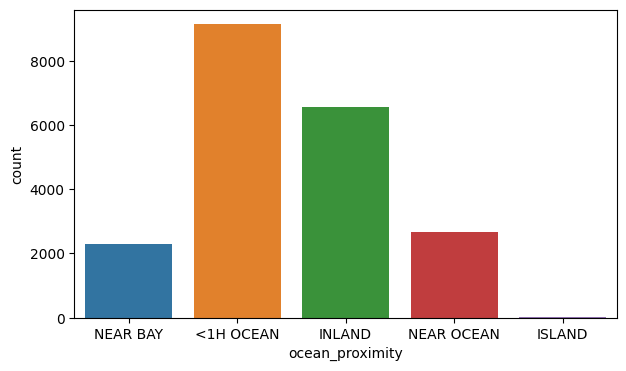

In [6]:
# Plot jumlah kategori
plt.figure(figsize=(7,4))
sns.countplot(x=df.ocean_proximity);

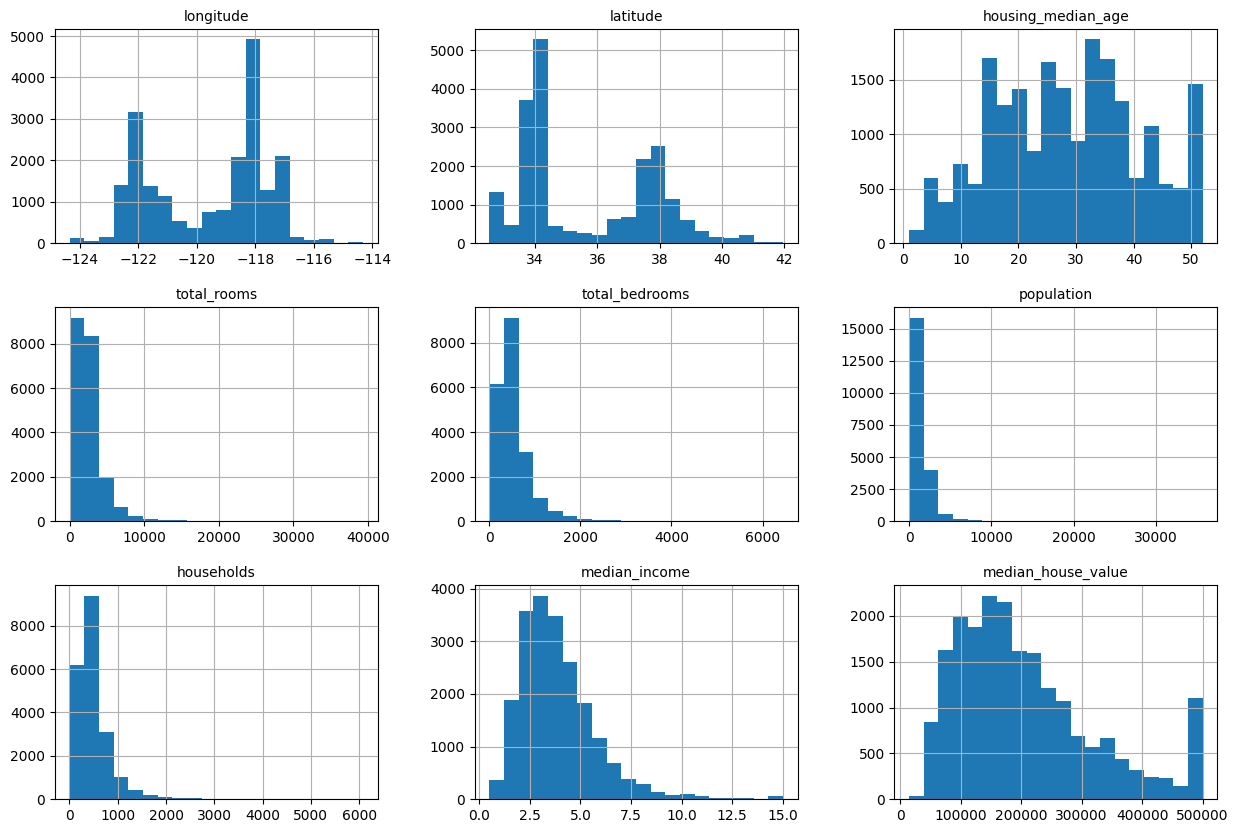

In [7]:
# Membuat plot histogram dari keseluruhan features dataframe
fig = df.hist(bins=20, figsize=(15,10))

# Mengatur besar font title
[x.title.set_size(10) for x in fig.ravel()]

plt.show()

## Data Preprocessing
Pada tahap ini, `null` values yang ditemukan akan diisi dengan nilai mean dan tipe data `text` menjadi `numerical`. 

### Fill Missing Value
Kita isi `null` values dengan nilai `mean` dari kolom dataframe kita

In [8]:
# Mengeluarkan informasi setiap kolom data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# Cek missing values pada kolom data total_bedrooms 
df.total_bedrooms.isna().sum()

207

In [10]:
# Melihat nilai mean dari total bed_rooms
df.total_bedrooms.mean()

537.8705525375618

In [11]:
int(df.total_bedrooms.mean())

537

In [12]:
# Isi missing values dengan nilai mean
df = df.fillna(int(df.total_bedrooms.mean()))

# Scaling
Tujuan dari scaling adalah membantu mencapai titik konvergen dengan lebih cepat dalam artian train model lebih cepat dalam beberapa kasus.

In [13]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [14]:
# Mengubah value dari dataframe menjadi range 0 hingga 1
scaler = MinMaxScaler()

# Membuang data dengan nama kolom pada columns yang kemudian disimpan pada variabel data
columns_ = ['median_house_value', 'ocean_proximity']
data = df.drop(columns_, axis=1)

# Mengubah value dari data menjadi range 0 hingga 1
df_scaled = scaler.fit_transform(data.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=data.columns)

df_scaled = pd.concat([df_scaled, df[columns_]], axis=1)
df_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,452600.0,NEAR BAY
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,358500.0,NEAR BAY
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,352100.0,NEAR BAY
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,341300.0,NEAR BAY
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,342200.0,NEAR BAY


### Encode Tipe Data String
Melakukan train model harus menggunakan data numerical sehingga untuk tipe data `object` harus kita ubah menjadi numerical dengan pandas `get_dummies` 

In [15]:
# Mengubah data text menjadi numeric (categorical) dengan get_dummies
new_columns = pd.get_dummies(df_scaled.ocean_proximity)
new_columns.head(5)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [16]:
# Menghapus kolom ocean_proximity karena akan digantikan new_columns yang berisi data numerik 
df_scaled.drop(['ocean_proximity'], 
        axis=1, 
        inplace=True)

df_scaled = df_scaled.drop(['ocean_proximity'], 
                axis=1)


In [17]:
# Memasukkan data new_columns kedalam dataframe utama
df_scaled[new_columns.columns] = new_columns 
df_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,452600.0,0,0,0,1,0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,358500.0,0,0,0,1,0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,352100.0,0,0,0,1,0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,341300.0,0,0,0,1,0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,342200.0,0,0,0,1,0


In [18]:
# Last check sebelum masuk ke data splitting
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   <1H OCEAN           20640 non-null  uint8  
 10  INLAND              20640 non-null  uint8  
 11  ISLAND              20640 non-null  uint8  
 12  NEAR BAY            20640 non-null  uint8  
 13  NEAR OCEAN          20640 non-null  uint8  
dtypes: float64(9), uint8(5)
memory usage: 1.5 MB


## Data Splitting
Pembagian data train untuk model belajar dengan test untuk mengevaluasi kinerja model yang telah belajar.

In [19]:
df_scaled.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

In [20]:
X = df_scaled.drop(['median_house_value'], axis=1)
y = df_scaled.median_house_value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
print('TRAIN DATA')
print(f'x_train: {X_train.shape[0]}')
print(f'y_train: {y_train.shape[0]}')
print('--\nTEST DATA')
print(f'x_test: {X_test.shape[0]}')
print(f'y_test: {y_test.shape[0]}')

TRAIN DATA
x_train: 16512
y_train: 16512
--
TEST DATA
x_test: 4128
y_test: 4128


## Model Training

In [22]:
# Inisiasi model RandomForestRegressor
model = RandomForestRegressor()

# Melatih model pada data_train
model.fit(X_train, y_train)

RandomForestRegressor()

## Model Evaluation

In [23]:
# Melakukan prediksi pada x_test
y_pred = model.predict(X_test)

# Skor persentase akurasi dari model
accuracy = r2_score(y_pred, y_test)
print(f'Akurasi model RandomForestRegressor: {round(accuracy * 100, 2)}%')

# Skor error terhadap nilai aktual
MAE = mean_absolute_error(y_pred, y_test)
print(f'Skor MAE: {round(MAE, 2)}')

Akurasi model RandomForestRegressor: 77.67%
Skor MAE: 31492.74


## (Optional Experiment) Feature Engineering


In [24]:
df_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,452600.0,0,0,0,1,0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,358500.0,0,0,0,1,0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,352100.0,0,0,0,1,0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,341300.0,0,0,0,1,0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,342200.0,0,0,0,1,0


In [25]:
df_scaled['mix_longitude_latitude'] = df_scaled['longitude'] * df_scaled['latitude']

In [26]:
df_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,mix_longitude_latitude
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,452600.0,0,0,0,1,0,0.119827
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,358500.0,0,0,0,1,0,0.119941
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,352100.0,0,0,0,1,0,0.118592
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,341300.0,0,0,0,1,0,0.118029
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,342200.0,0,0,0,1,0,0.118029


In [27]:
X = df_scaled.drop(['median_house_value'], axis=1)
y = df_scaled.median_house_value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
model_fe = RandomForestRegressor()
model_fe.fit(X_train, y_train)

RandomForestRegressor()

In [29]:
# Melakukan prediksi pada x_test
y_pred = model_fe.predict(X_test)

# Skor persentase akurasi dari model
accuracy = r2_score(y_pred, y_test)
print(f'[SETELAH FEATURE ENGINEERING]\nAkurasi model RandomForestRegressor: {round(accuracy * 100, 2)}%')

# Skor error terhadap nilai aktual
MAE = mean_absolute_error(y_pred, y_test)
print(f'Skor MAE: {round(MAE, 2)}')

[SETELAH FEATURE ENGINEERING]
Akurasi model RandomForestRegressor: 78.96%
Skor MAE: 30704.77


[SEBELUM FEATURE ENGINEERING]<BR>
Akurasi model RandomForestRegressor: 77.82%<Br>
Skor MAE: 31450.24